<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_descritivos/blob/main/6_HandsOn6__DBSCAN_e_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos descritivos**


Professor: Matheus Soares de Lacerda

Sala: 01

**Alunos:**

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

Hands-On 6: Detecção de Anomalias em Dados de Transações Financeiras

O objetivo deste estudo é aplicar técnicas de detecção de anomalias, especificamente o Isolation Forest e o DBSCAN, a um conjunto de dados de contas financeiras. O propósito é identificar contas de transações que se desviam significativamente do comportamento típico, o que pode indicar atividades fraudulentas ou incomuns.🕵️‍♂️💳📈🔍

**Base**: https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2005/dados/credit_card.csv

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Vamos começar com a importação dos dados e uma análise exploratória dos dados.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2005/dados/credit_card.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Há um valor faltande no limite de crédito.

In [ ]:
data[data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Vamos optar por remover essa linha.

Vamos checar agora as linhas em que os pagamentos minimos são nulos.

In [ ]:
data[data['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [ ]:
data = data[~data['CREDIT_LIMIT'].isnull()]
data = data[~data['MINIMUM_PAYMENTS'].isnull()]

Como estamos tratando de cartões de crédito, não deveriamos ter compras maiores do que o limite do cartão de crédito. Vamos checar isso.

In [ ]:
data[data['PURCHASES'] > data['CREDIT_LIMIT']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12
51,C10053,1078.888565,1.000000,3107.85,2221.74,886.11,0.000000,0.666667,0.583333,0.500000,0.000000,0,18,2500.0,1399.828340,1322.446601,0.000000,12
64,C10067,1923.886805,1.000000,1887.64,0.00,1887.64,1605.949371,1.000000,0.000000,1.000000,0.083333,4,61,1850.0,3688.045998,3266.996777,0.083333,12
125,C10131,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,C19097,227.220411,1.000000,1387.60,288.54,1099.06,107.660394,1.000000,0.875000,0.875000,0.125000,1,71,1000.0,1217.473837,136.283049,0.142857,8
8883,C19124,931.907808,1.000000,1142.12,0.00,1142.12,1113.924335,1.000000,0.000000,0.857143,0.285714,3,14,1000.0,957.421268,1064.015704,0.000000,7
8897,C19138,328.686581,1.000000,2806.78,2588.53,218.25,0.000000,0.857143,0.714286,0.285714,0.000000,0,26,1200.0,1796.886852,93.017466,0.250000,7
8898,C19139,379.288635,0.714286,550.00,50.00,500.00,388.818230,0.571429,0.142857,0.571429,0.142857,2,6,500.0,509.404913,531.988210,0.000000,7


Poderíamos inicialmente remover esses valores. No entanto, visto que queremos justamente identificar anomalias, vamos manter essas linhas dentro do dataset, a fim de identificá-las posteriormente.

---
Agora, vamos analisar a distruibição das colunas:

*   BALANCE
*   BALANCE_FREQUENCY
*   PURCHASES
* PURCHASES_FREQUENCY
*   CREDIT_LIMIT
* PURCHASES_INSTALLMENTS_FREQUENCY
* TENURE





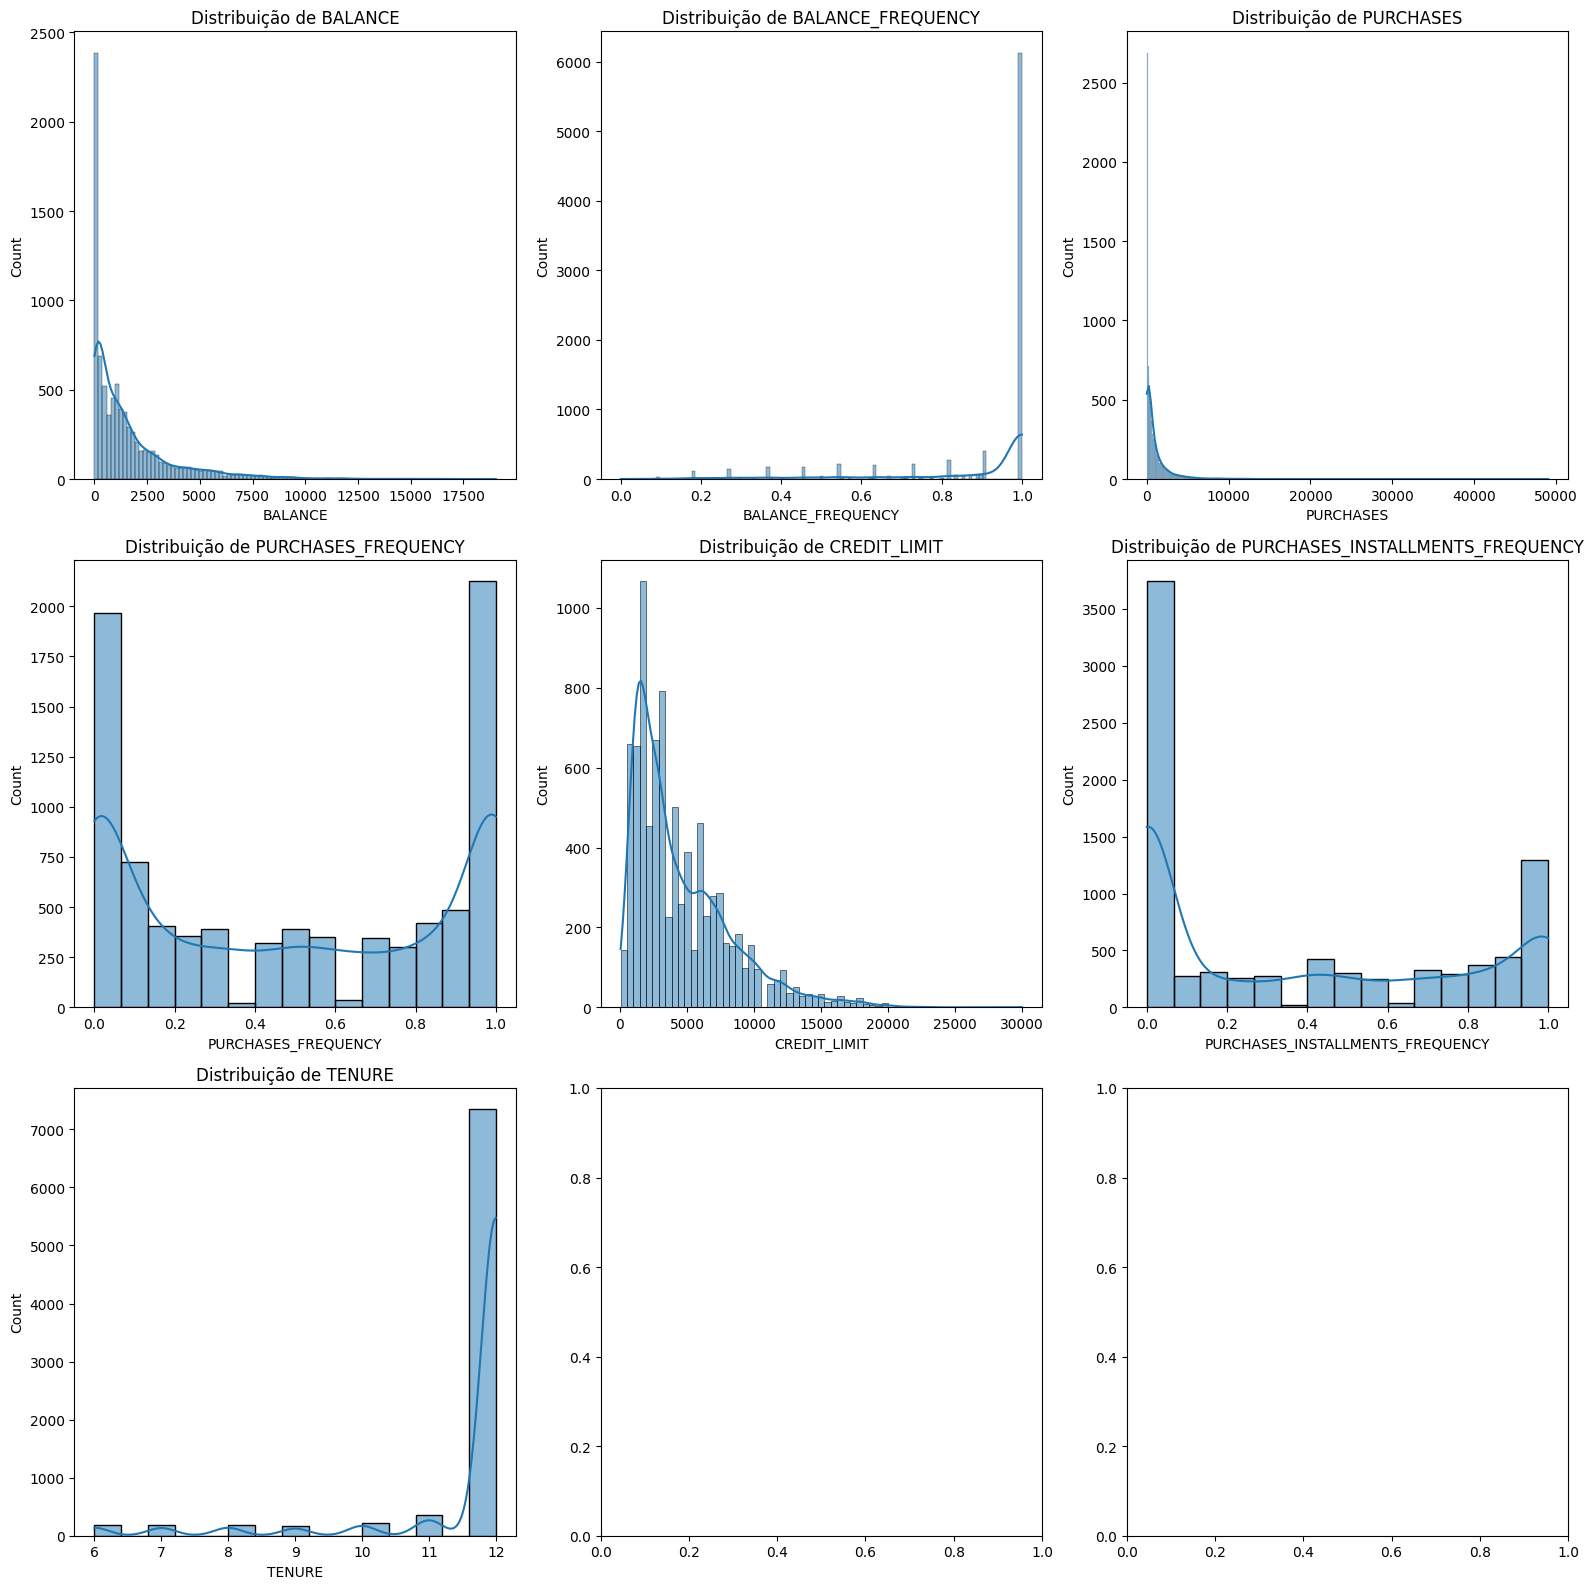

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_FREQUENCY',
        'CREDIT_LIMIT', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'TENURE']

fig, axes = plt.subplots(3, 3, figsize=(16, 16))

axes_flat = axes.flatten()

for i, col in enumerate(cols):
    if i < 9:
        sns.histplot(data[col], ax=axes_flat[i], kde=True)
        axes_flat[i].set_title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()


É possível perceber que a maioria dos clientes tem valores de compras baixos. Portanto, valores de compras muito altos podem indicar uma possível anomalia.

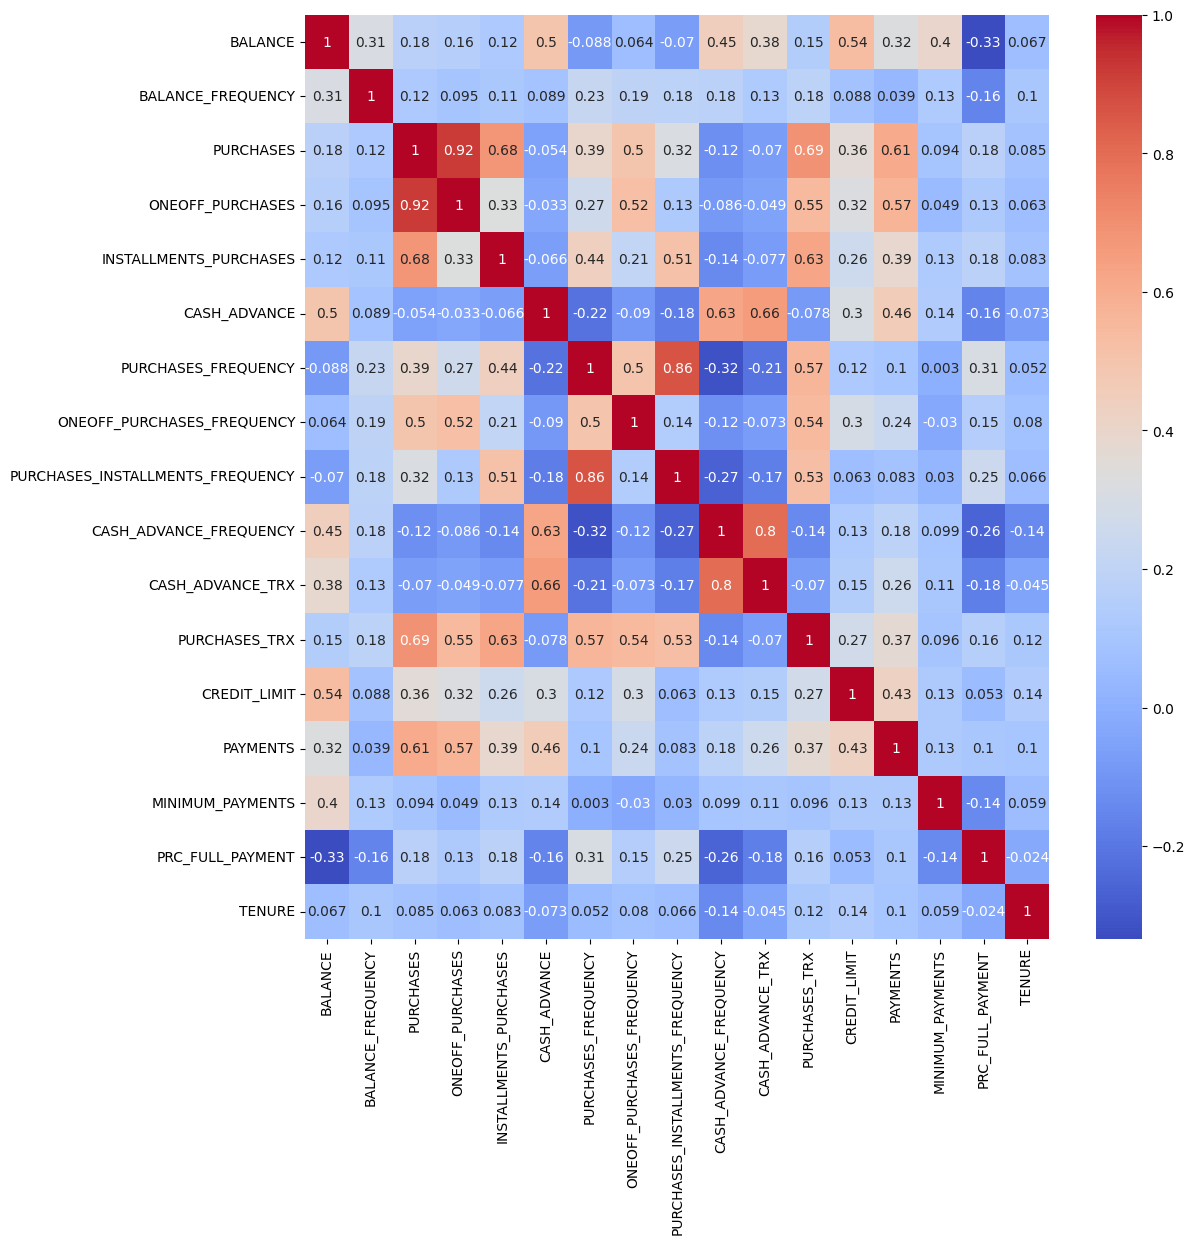

In [ ]:
#plotar a correlação das variáveis
variables = data.columns.tolist()
variables.remove('CUST_ID')


plt.figure(figsize=(12, 12))
sns.heatmap(data[variables].corr(), annot=True, cmap='coolwarm')
plt.show()


Vamos começar com uma clusterização com o método dbscan sem reduzir a dimensionalidade das variáveis para avaliar o que é encontrado como ruído,  esses serão as anomalias.


Vamos primeiro padronizar as variáveis.

In [ ]:
#padronizando as colunas, gerando um novo df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame()
data_scaled['CUST_ID'] = data['CUST_ID'].copy()
print(variables)
for variable in variables:
  print(len(data[[variable]]))
  data_scaled[variable] = scaler.fit_transform(data[[variable]].copy())

print(data_scaled.shape)
data_scaled.head()

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
8636
(8636, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,C10002,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,C10003,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,C10005,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,C10006,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Como temos muitas variáveis, vamos usar o método do PCA para reduzir para apenas 2 variáveis.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assumindo que 'data_scaled' é seu DataFrame já padronizado e 'variables' é sua lista de variáveis

# Aplicando PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled[variables])

variancia_matriz = pca.explained_variance_ratio_

n_ = 5
print(f"Primeiros {n_} componentes:")
for i, ratio in enumerate(variancia_matriz[:n_], 1):
    print(f"PC{i}: {ratio:.4f}")


contrib_vars = pca.components_.T * np.sqrt(pca.explained_variance_)

contrib_vars_df = pd.DataFrame(contrib_vars, columns=[f'PC{i+1}' for i in range(len(variables))], index=variables)

top_components = 2
for i in range(top_components):
    print(f"\nVariáveis mais influentes para PC{i+1}:")
    top_ = contrib_vars_df[f'PC{i+1}'].abs().nlargest(3)
    print(top_)

data_scaled['PC1'] = pca_result[:, 0]
data_scaled['PC2'] = pca_result[:, 1]

Primeiros 5 componentes:
PC1: 0.2723
PC2: 0.2037
PC3: 0.0892
PC4: 0.0757
PC5: 0.0628

Variáveis mais influentes para PC1:
PURCHASES           0.886828
PURCHASES_TRX       0.841460
ONEOFF_PURCHASES    0.746158
Name: PC1, dtype: float64

Variáveis mais influentes para PC2:
CASH_ADVANCE              0.813800
CASH_ADVANCE_FREQUENCY    0.800307
CASH_ADVANCE_TRX          0.775022
Name: PC2, dtype: float64


Com isso, sabemos que as variáveis que mais irão influenciar no nosso processo de encontrar as anomalias serão o valor das compras, número de transações, compras de uma vez, adiantamento em dinheiro, frequencia do adiantamento e número de adiantamentos.

In [ ]:
data_scaled_original = data_scaled.copy()
data_scaled = data_scaled[['CUST_ID', 'PC1', 'PC2']]

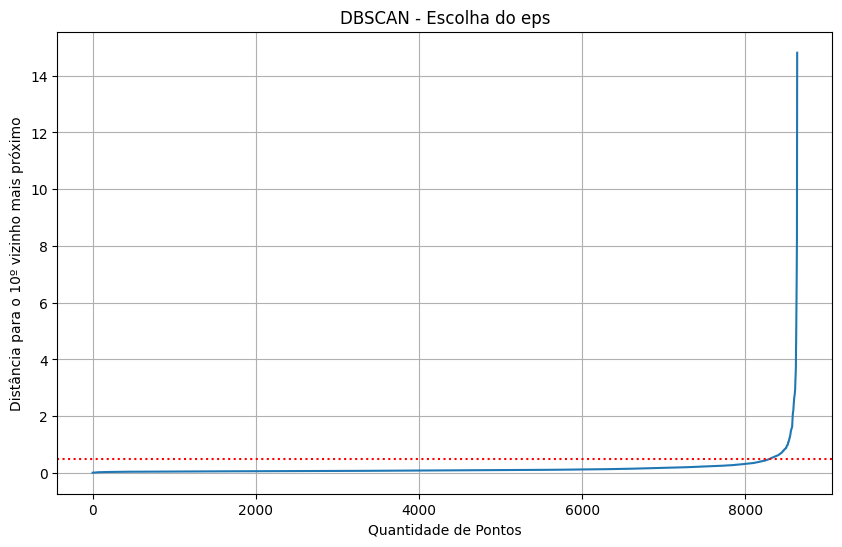

In [ ]:
# Importa as bibliotecas necessárias
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Define o número mínimo de amostras para o DBSCAN
dbscan = DBSCAN(eps=None, min_samples=10)  # Fixa o min_samples

variables = ['PC1', 'PC2']
# Cria o modelo de vizinhos mais próximos com o número de vizinhos definido
neigh = NearestNeighbors(n_neighbors=dbscan.min_samples)
neigh.fit(data_scaled[variables])

# Calcula as distâncias para os min_samples vizinhos mais próximos de cada ponto
distances, _ = neigh.kneighbors()

# Ordena as distâncias em ordem crescente
sorted_distances = sorted(distances[:, -1])

# Plota a curva do Método do Joelho (Knee Method)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Quantidade de Pontos')
plt.ylabel(f'Distância para o {dbscan.min_samples}º vizinho mais próximo')
plt.title('DBSCAN - Escolha do eps')
plt.grid(True)

# Desenha uma linha horizontal vermelha pontilhada para indicar um possível valor de corte
plt.axhline(y=0.5, color='red', linestyle=':')

# Exibe o gráfico
plt.show()


Com base no método do joelho, vamos escolher um eps=0.5.

In [ ]:
dbscan = DBSCAN(eps=.5, min_samples=10)
isolation_forest = IsolationForest(contamination=0.01)

dbscan_clusters = dbscan.fit_predict(data_scaled[variables])
isolation_forest_scores = isolation_forest.fit_predict(data_scaled[variables])

data_scaled['cluster'] = dbscan_clusters
data_scaled['isolation_forest_scores'] = isolation_forest_scores

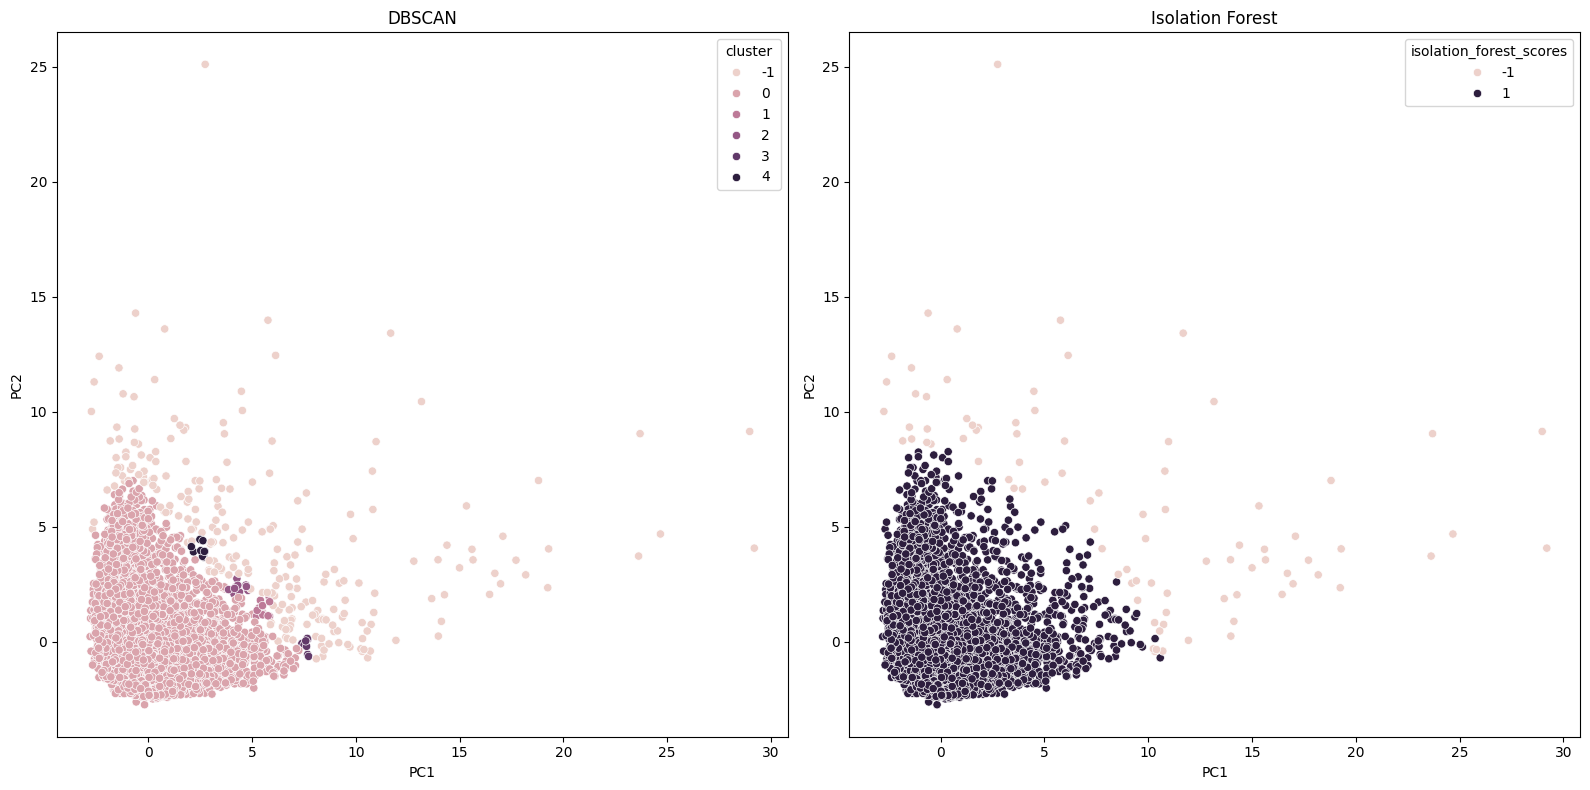

In [ ]:
#plotar o gráfico dos dois métoodos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(data=data_scaled, x='PC1', y='PC2', hue='cluster', ax=axes[0])
axes[0].set_title('DBSCAN')

sns.scatterplot(data=data_scaled, x='PC1', y='PC2', hue='isolation_forest_scores', ax=axes[1])
axes[1].set_title('Isolation Forest')

plt.tight_layout()
plt.show()

A partir de uma primeira avaliação das anomalias encontradas, podemos perceber que o método de isolation forest foi o que caracterizou menos transações como suspeitas. Vamos analisar essas transações.

In [ ]:
#filtrar somente o ruido do isolation forest
iso_ruido = data_scaled[data_scaled['isolation_forest_scores'] == -1]
dbscan_ruido = data_scaled[data_scaled['cluster'] == -1]
iso_ruido.head()

,CUST_ID,PC1,PC2,cluster,isolation_forest_scores
71,C10074,4.489904,10.893536,-1,-1
138,C10144,18.805662,7.014401,-1,-1
153,C10159,10.801254,7.423117,-1,-1
220,C10229,10.152670,2.555975,-1,-1
273,C10284,19.293861,4.041376,-1,-1


In [ ]:
iso_ruido_2 = pd.merge(data_scaled_original[['CUST_ID', 'PURCHASES', 'CREDIT_LIMIT']], iso_ruido, on='CUST_ID')
dbscan_ruido_2 = pd.merge(data_scaled_original[['CUST_ID', 'PURCHASES', 'CREDIT_LIMIT']], dbscan_ruido, on='CUST_ID')

In [ ]:
print(iso_ruido_2[iso_ruido_2['PURCHASES'] >= iso_ruido_2['CREDIT_LIMIT']].shape)
print(dbscan_ruido_2[dbscan_ruido_2['PURCHASES'] >= dbscan_ruido_2['CREDIT_LIMIT']].shape)

(53, 7)
(131, 7)


Apesar de ser mais seletivo, o método de isolation forest não foi capaz de encontrar tantas compras com valor acima do limite de crédito quanto o DBSCAN.